<a href="https://colab.research.google.com/github/debarshee2004/house_price_prediction/blob/master/house_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HOUSE PRICE PREDICTION MODEL🏡

## Introduction

This project focuses on creating predictive models using Jupyter Notebooks with a dataset from the second chapter of Aurélien Géron's book 'Hands-On Machine learning with Scikit-Learn and TensorFlow.' The dataset contains information from the 1990 California census and is an excellent resource for introducing machine learning algorithms. This README provides an overview of the project, its objectives, the dataset, and how to use the Jupyter Notebooks.

## Project Overview

The primary objective of this project is to build predictive models using machine learning algorithms and Jupyter Notebooks. The dataset used in this project is based on the 1990 California census and contains various attributes related to housing in California districts. By developing predictive models, we aim to gain insights into housing-related factors and create models that can predict housing prices based on the provided features.

## Dataset

### Data Source

The dataset was initially featured in the paper "Sparse spatial autoregressions" by R. Kelley Pace and Ronald Barry in 1997. It has been modified and is also available from Luís Torgo's page (University of Porto). The dataset has been popularized by Aurélien Géron in his book 'Hands-On Machine learning with Scikit-Learn and TensorFlow.'

### Data Description

The dataset contains the following columns:

1. `longitude`: The longitude of the district.
2. `latitude`: The latitude of the district.
3. `housing_median_age`: The median age of housing in the district.
4. `total_rooms`: The total number of rooms in the district.
5. `total_bedrooms`: The total number of bedrooms in the district.
6. `population`: The population of the district.
7. `households`: The number of households in the district.
8. `median_income`: The median income of residents in the district.
9. `median_house_value`: The median value of houses in the district (target variable).
10. `ocean_proximity`: The proximity of the district to the ocean.

### Data Cleaning

Please note that the data may require some preprocessing steps. You should ensure that you clean and prepare the data before using it for modeling.

## Getting Started

To get started with this project, follow these steps:

1. Clone or download the project repository from [GitHub](https://github.com/yourusername/your-repository).

2. Install the necessary libraries and dependencies. You can do this by creating a virtual environment and running:

   ```bash
   pip install -r requirements.txt
   ```

3. Open the Jupyter Notebooks provided in the project repository to start working on the predictive models.

4. Follow the step-by-step instructions and code within the Jupyter Notebooks to build and evaluate machine learning models.

## Additional Resources

- For a comprehensive introduction to machine learning with this dataset, you can refer to the book 'Hands-On Machine learning with Scikit-Learn and TensorFlow' by Aurélien Géron.

- You can also explore other tutorials and resources, such as the [Python-based introductory tutorial](https://github.com/ageron/handson-ml/tree/master/datasets/housing) by Aurélien Géron.

## Conclusion

This project provides an opportunity to learn and practice predictive modeling using real-world data. By following the Jupyter Notebooks and leveraging the provided dataset, you can gain valuable insights into the basics of machine learning and develop predictive models for housing-related tasks. Enjoy your journey into the world of predictive modeling!

## Setup of the project

In [1]:
# Installing Libraries
! pip install pandas
! pip install numpy
! pip install matplotlib
! pip install seaborn
! pip install scikit-learn
! pip install kaggle

In [2]:
from google.colab import files
files.upload()  # This will open a file uploader in your notebook.

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"test200414","key":"0f37bbcc50c83128347ff1ab2af928ac"}'}

In [3]:
# Create a kaggle folder
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [4]:
# Copy the file to the folder
! cp kaggle.json ~/.kaggle/

In [5]:
!chmod 600 ~/.kaggle/kaggle.json
# Make sure the API token has the correct permissions. You can do this with the following commands

In [6]:
! kaggle datasets list

ref                                                         title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
iamsouravbanerjee/customer-shopping-trends-dataset          Customer Shopping Trends Dataset                   146KB  2023-10-05 06:45:37          16812        360  1.0              
nelgiriyewithana/billionaires-statistics-dataset            Billionaires Statistics Dataset (2023)             139KB  2023-09-29 13:39:28           9098        232  1.0              
asaniczka/top-spotify-songs-in-73-countries-daily-updated   Top Spotify Songs in 73 Countries (Daily Updated)    5MB  2023-11-02 23:27:05           2072         62  1.0              
zeesolver/consumer-behavior-and-shopping-habits-dataset     Consumer Behavior and Sho

In [7]:
! kaggle datasets download -d camnugent/california-housing-prices

  0% 0.00/400k [00:00<?, ?B/s]
100% 400k/400k [00:00<00:00, 98.1MB/s]


In [8]:
! unzip california-housing-prices.zip

Archive:  california-housing-prices.zip
  inflating: housing.csv             


In [9]:
# Importing Libraries in to the notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [10]:
data = pd.read_csv("housing.csv")

In [11]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [13]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

# AboutData

## Dataset Name
California Housing Dataset

## Context
This dataset is featured in the second chapter of Aurélien Géron's book, 'Hands-On Machine Learning with Scikit-Learn and TensorFlow.' It is an excellent resource for learning about machine learning algorithms, offering a balance between data cleaning complexity and dataset size. The dataset contains information from the 1990 California census, making it a valuable resource for teaching the fundamentals of machine learning.

## Content
The dataset contains information about houses in various California districts, along with summary statistics based on the 1990 census data. Please note that the data may require preprocessing before use. The columns in the dataset are as follows:

1. `longitude`: The longitude of the district.
2. `latitude`: The latitude of the district.
3. `housing_median_age`: The median age of houses in the district.
4. `total_rooms`: The total number of rooms in the district.
5. `total_bedrooms`: The total number of bedrooms in the district.
6. `population`: The total population of the district.
7. `households`: The number of households in the district.
8. `median_income`: The median income of households in the district.
9. `median_house_value`: The median house value in the district.
10. `ocean_proximity`: The proximity of the district to the ocean.

## Acknowledgements
This dataset was initially featured in the following paper:
- Pace, R. Kelley, and Ronald Barry. "Sparse spatial autoregressions." Statistics & Probability Letters 33.3 (1997): 291-297.

Aurélien Géron included it in his book 'Hands-On Machine Learning with Scikit-Learn and TensorFlow.'

The dataset is a modified version of the California Housing dataset available from Luís Torgo's page at the University of Porto.

## Inspiration
For further insights and tutorials related to this dataset, you can explore:

- [Machine Learning Basics in R using this dataset](https://github.com/ageron/handson-ml/tree/master/datasets/housing)
- Aurélien Géron's book 'Hands-On Machine Learning with Scikit-Learn and TensorFlow'

This dataset provides an excellent opportunity for hands-on learning and experimentation in machine learning.

## Cleaning and Preprocessing the `data` for the Model🎥

In [14]:
# Removing the rows null values
data.dropna(inplace = True)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

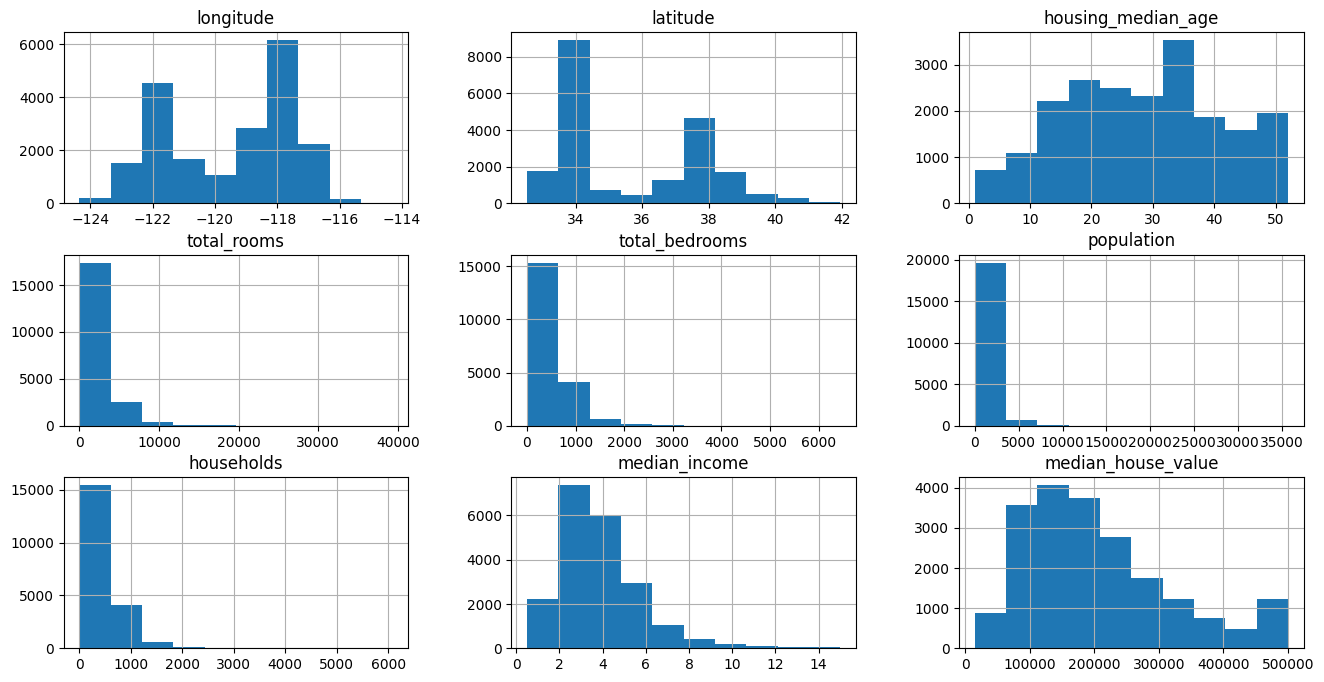

In [16]:
data.hist(figsize=(16,8))

In [17]:
dis = data.drop('ocean_proximity', axis=1)

In [18]:
dis.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924616,-0.109357,0.045480,0.069608,0.100270,0.056513,-0.015550,-0.045398
latitude,-0.924616,1.000000,0.011899,-0.036667,-0.066983,-0.108997,-0.071774,-0.079626,-0.144638
housing_median_age,-0.109357,0.011899,1.000000,-0.360628,-0.320451,-0.295787,-0.302768,-0.118278,0.106432
total_rooms,0.045480,-0.036667,-0.360628,1.000000,0.930380,0.857281,0.918992,0.197882,0.133294
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.100270,-0.108997,-0.295787,0.857281,0.877747,1.000000,0.907186,0.005087,-0.025300
households,0.056513,-0.071774,-0.302768,0.918992,0.979728,0.907186,1.000000,0.013434,0.064894
median_income,-0.015550,-0.079626,-0.118278,0.197882,-0.007723,0.005087,0.013434,1.000000,0.688355
median_house_value,-0.045398,-0.144638,0.106432,0.133294,0.049686,-0.025300,0.064894,0.688355,1.000000


In [19]:
import seaborn as sns

<Axes: >

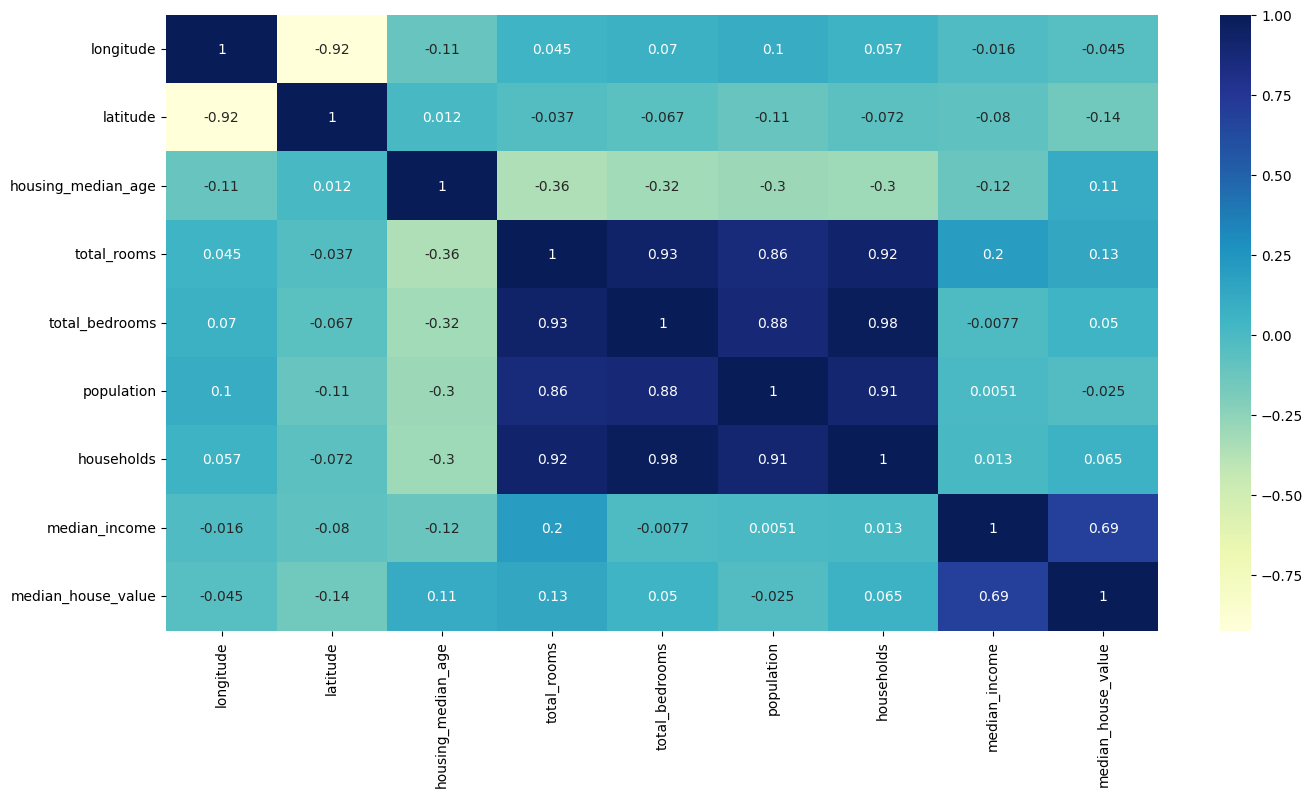

In [20]:
plt.figure(figsize=(16,8))
sns.heatmap(dis.corr(), annot=True, cmap="YlGnBu")

In [21]:
data["total_rooms"] = np.log(data["total_rooms"] + 1)
data["total_bedrooms"] = np.log(data["total_bedrooms"] + 1)
data["population"] = np.log(data["population"] + 1)
data["households"] = np.log(data["households"] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

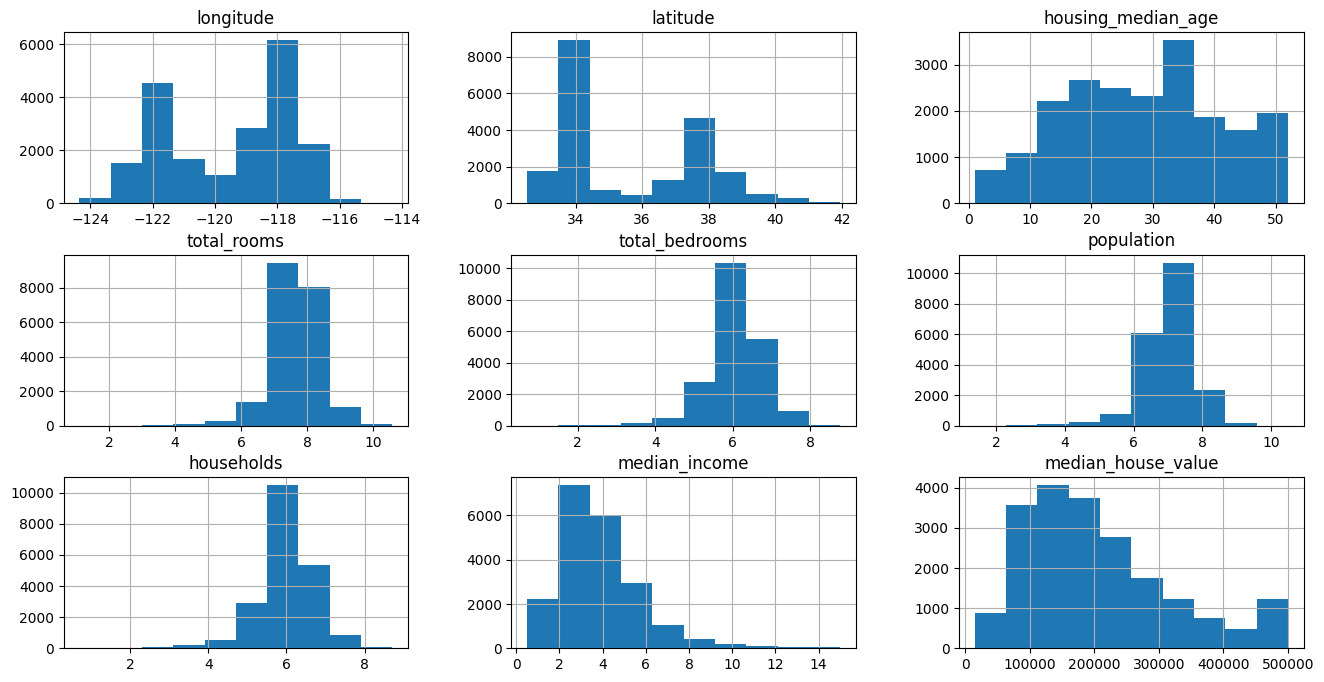

In [22]:
data.hist(figsize=(16,8))

In [23]:
dis = data.drop('ocean_proximity', axis=1)

<Axes: >

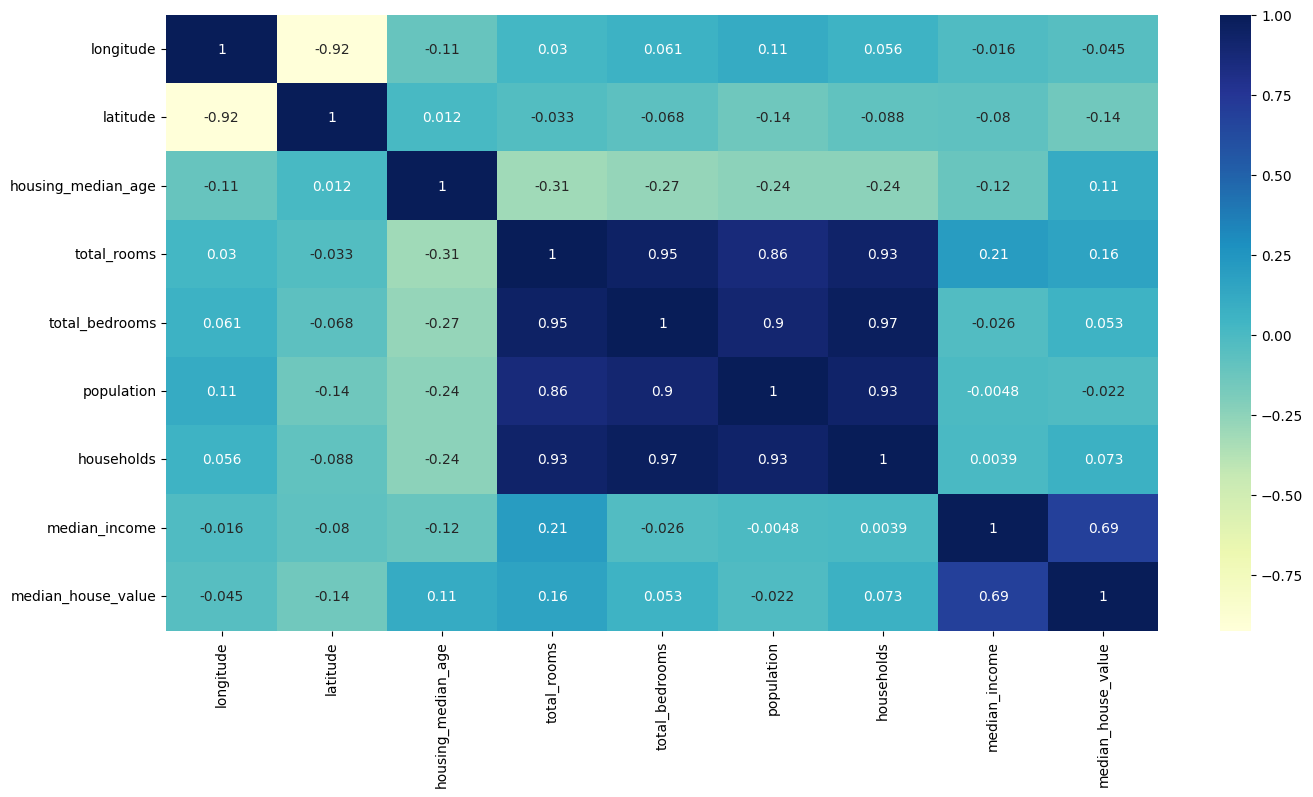

In [24]:
plt.figure(figsize=(16,8))
sns.heatmap(dis.corr(), annot=True, cmap="YlGnBu")

In [25]:
# While building a model its hard to work with non-numerical data.
# So we need to convert them into numerical values.
data.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: count, dtype: int64

In [26]:
pd.get_dummies(data.ocean_proximity)

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,False,False,False,True,False
1,False,False,False,True,False
2,False,False,False,True,False
3,False,False,False,True,False
4,False,False,False,True,False
...,...,...,...,...,...
20635,False,True,False,False,False
20636,False,True,False,False,False
20637,False,True,False,False,False
20638,False,True,False,False,False


In [27]:
# data.join(pd.get_dummies(data.ocean_proximity)).drop('ocean_proximity', axis=1)

# Create one-hot encoded columns for 'ocean_proximity'
dummies = pd.get_dummies(data['ocean_proximity'])

# Replace True/False with 1/0
dummies = dummies.astype(int)

# Join the one-hot encoded columns to your DataFrame
data = data.join(dummies)

# Drop the original 'ocean_proximity' column
data = data.drop('ocean_proximity', axis=1)

In [28]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,6.781058,4.867534,5.777652,4.844187,8.3252,452600.0,0,0,0,1,0
1,-122.22,37.86,21.0,8.867850,7.009409,7.784057,7.037906,8.3014,358500.0,0,0,0,1,0
2,-122.24,37.85,52.0,7.291656,5.252273,6.208590,5.181784,7.2574,352100.0,0,0,0,1,0
3,-122.25,37.85,52.0,7.150701,5.463832,6.326149,5.393628,5.6431,341300.0,0,0,0,1,0
4,-122.25,37.85,52.0,7.395108,5.638355,6.338594,5.560682,3.8462,342200.0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,7.418181,5.926926,6.740519,5.802118,1.5603,78100.0,0,1,0,0,0
20636,-121.21,39.49,18.0,6.548219,5.017280,5.877736,4.744932,2.5568,77100.0,0,1,0,0,0
20637,-121.22,39.43,17.0,7.720905,6.186209,6.915723,6.073045,1.7000,92300.0,0,1,0,0,0
20638,-121.32,39.43,18.0,7.528869,6.016157,6.609349,5.857933,1.8672,84700.0,0,1,0,0,0


<Axes: >

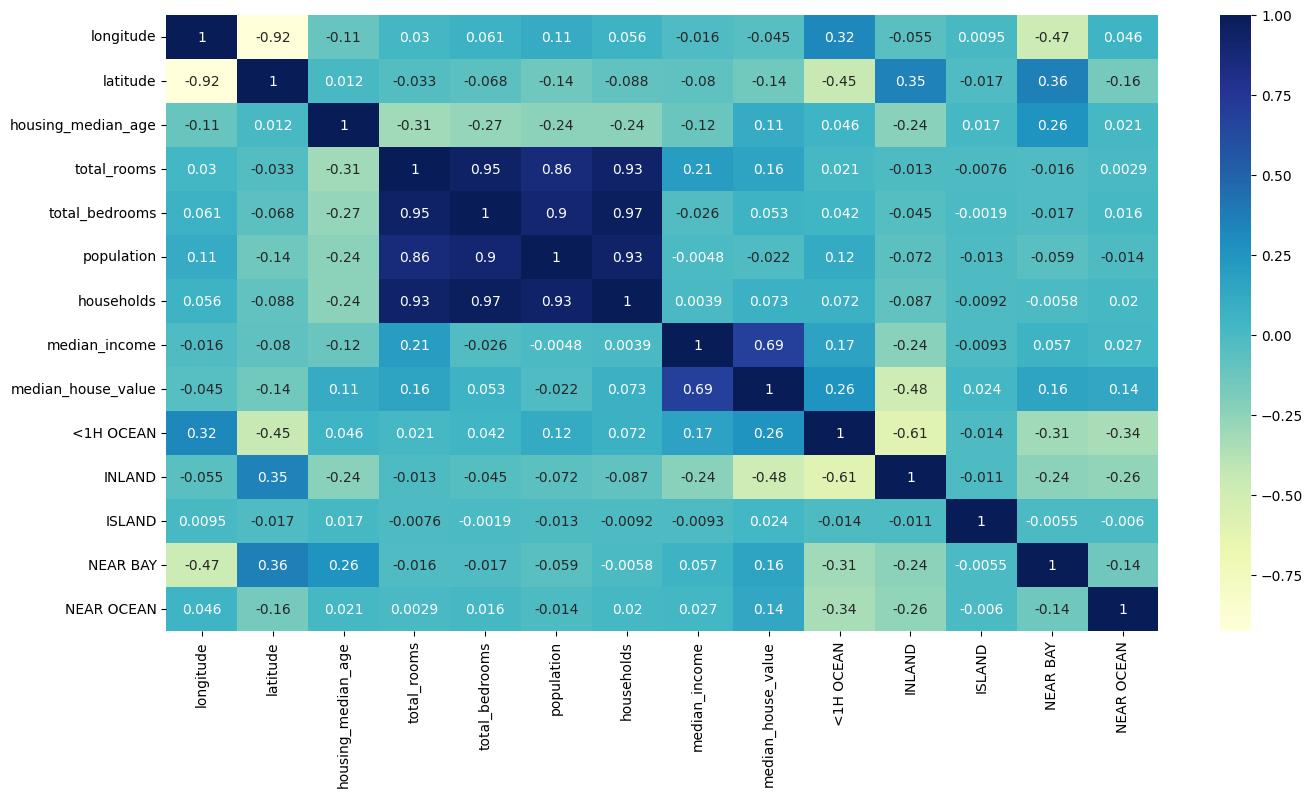

In [29]:
plt.figure(figsize=(16,8))
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")

<Axes: xlabel='latitude', ylabel='longitude'>

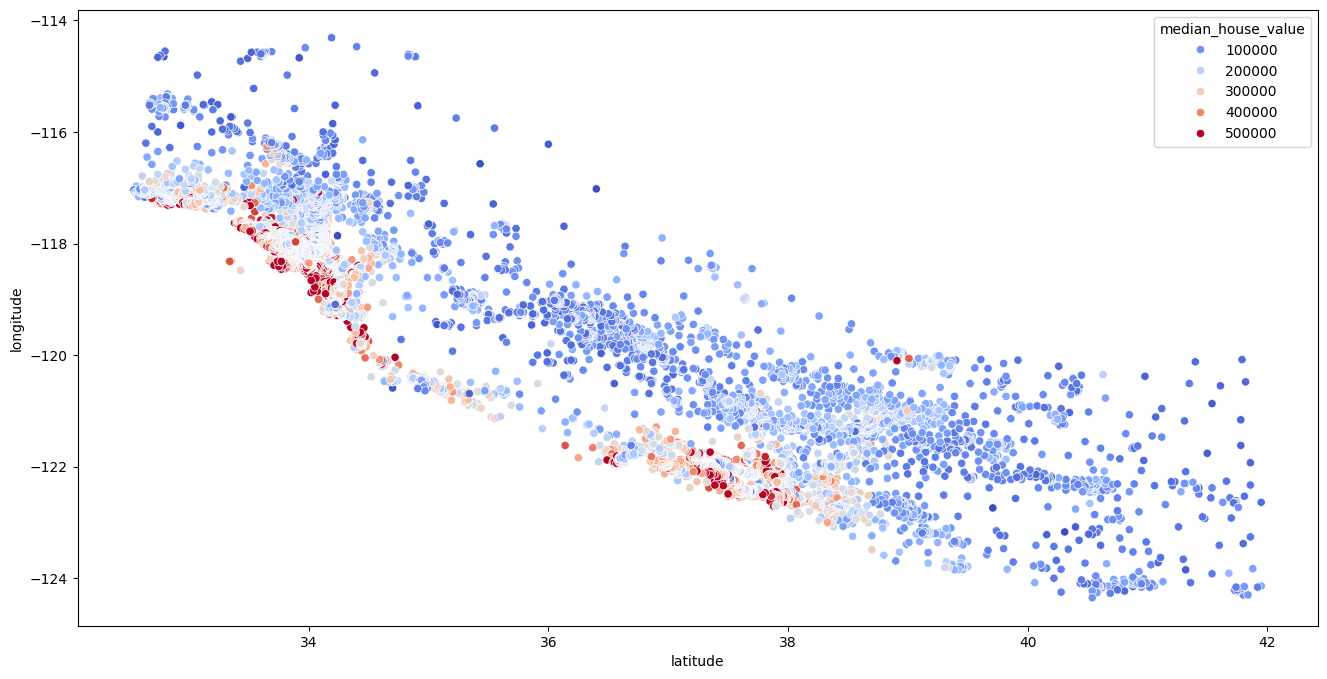

In [30]:
plt.figure(figsize=(16, 8))
sns.scatterplot(x="latitude", y="longitude", data=data, hue="median_house_value", palette="coolwarm")

In [31]:
data["bedroom_ratio"] = data["total_bedrooms"]/data["total_rooms"]
data["household_rooms"] = data["total_rooms"]/data["households"]

In [32]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
0,-122.23,37.88,41.0,6.781058,4.867534,5.777652,4.844187,8.3252,452600.0,0,0,0,1,0,0.717813,1.399834
1,-122.22,37.86,21.0,8.867850,7.009409,7.784057,7.037906,8.3014,358500.0,0,0,0,1,0,0.790429,1.260013
2,-122.24,37.85,52.0,7.291656,5.252273,6.208590,5.181784,7.2574,352100.0,0,0,0,1,0,0.720313,1.407171
3,-122.25,37.85,52.0,7.150701,5.463832,6.326149,5.393628,5.6431,341300.0,0,0,0,1,0,0.764097,1.325768
4,-122.25,37.85,52.0,7.395108,5.638355,6.338594,5.560682,3.8462,342200.0,0,0,0,1,0,0.762444,1.329892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,7.418181,5.926926,6.740519,5.802118,1.5603,78100.0,0,1,0,0,0,0.798973,1.278530
20636,-121.21,39.49,18.0,6.548219,5.017280,5.877736,4.744932,2.5568,77100.0,0,1,0,0,0,0.766205,1.380045
20637,-121.22,39.43,17.0,7.720905,6.186209,6.915723,6.073045,1.7000,92300.0,0,1,0,0,0,0.801228,1.271340
20638,-121.32,39.43,18.0,7.528869,6.016157,6.609349,5.857933,1.8672,84700.0,0,1,0,0,0,0.799078,1.285243


<Axes: >

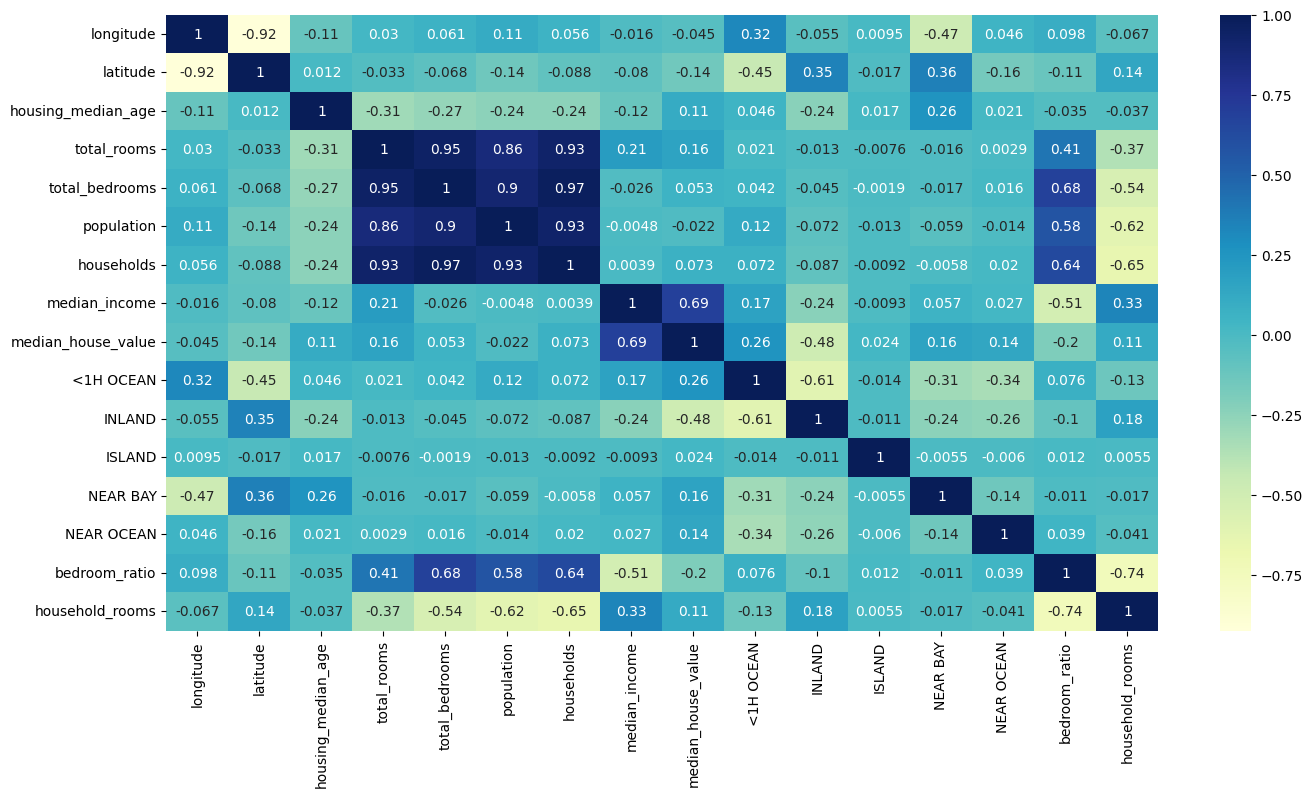

In [33]:
plt.figure(figsize=(16,8))
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")

## Splitting the `data` into `train_data` and `test_data`📑

In [34]:
# Separating the Input and Output
x = data.drop(["median_house_value"], axis=1)
y = data["median_house_value"]

In [35]:
x

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
0,-122.23,37.88,41.0,6.781058,4.867534,5.777652,4.844187,8.3252,0,0,0,1,0,0.717813,1.399834
1,-122.22,37.86,21.0,8.867850,7.009409,7.784057,7.037906,8.3014,0,0,0,1,0,0.790429,1.260013
2,-122.24,37.85,52.0,7.291656,5.252273,6.208590,5.181784,7.2574,0,0,0,1,0,0.720313,1.407171
3,-122.25,37.85,52.0,7.150701,5.463832,6.326149,5.393628,5.6431,0,0,0,1,0,0.764097,1.325768
4,-122.25,37.85,52.0,7.395108,5.638355,6.338594,5.560682,3.8462,0,0,0,1,0,0.762444,1.329892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,7.418181,5.926926,6.740519,5.802118,1.5603,0,1,0,0,0,0.798973,1.278530
20636,-121.21,39.49,18.0,6.548219,5.017280,5.877736,4.744932,2.5568,0,1,0,0,0,0.766205,1.380045
20637,-121.22,39.43,17.0,7.720905,6.186209,6.915723,6.073045,1.7000,0,1,0,0,0,0.801228,1.271340
20638,-121.32,39.43,18.0,7.528869,6.016157,6.609349,5.857933,1.8672,0,1,0,0,0,0.799078,1.285243


In [36]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

In [37]:
# Dividing the data in to train and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [38]:
x_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
1249,-122.09,39.13,28.0,8.335671,6.797940,7.858641,6.698268,2.3310,0,1,0,0,0,0.815524,1.244452
8043,-118.16,33.84,36.0,7.948738,6.352629,7.288244,6.345636,3.8646,1,0,0,0,0,0.799200,1.252631
4782,-118.32,34.03,35.0,8.067776,6.841615,7.706163,6.687109,2.1046,1,0,0,0,0,0.848018,1.206467
1599,-122.12,37.88,35.0,7.932362,5.894403,6.909753,5.897154,8.0448,0,0,0,1,0,0.743083,1.345117
8560,-118.41,33.92,22.0,7.758333,6.371612,7.040536,6.318968,4.5729,1,0,0,0,0,0.821260,1.227785
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19166,-122.70,38.43,28.0,7.368970,6.023448,7.217443,6.052089,1.6685,1,0,0,0,0,0.817407,1.217591
889,-121.95,37.55,21.0,9.276877,7.340187,8.423542,7.327123,6.6478,1,0,0,0,0,0.791235,1.266101
18674,-121.90,36.97,21.0,8.218248,6.622736,7.259116,6.411818,4.4485,0,0,0,0,1,0.805857,1.281734
18506,-122.00,37.00,16.0,3.496508,1.609438,3.610918,1.791759,2.6250,0,0,0,0,1,0.460299,1.951438


In [39]:
x_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
17094,-122.24,37.47,35.0,7.733684,6.198479,7.046647,6.079933,4.5556,0,0,0,0,1,0.801491,1.272001
9918,-122.31,38.32,33.0,7.809541,6.045005,7.119636,6.144186,3.7045,0,0,0,1,0,0.774054,1.271046
7868,-118.12,33.88,40.0,7.760041,6.349139,7.174724,6.300786,3.1923,1,0,0,0,0,0.818184,1.231599
17268,-119.71,34.40,36.0,7.521318,5.883322,6.618739,5.799093,4.2283,0,0,0,0,1,0.782220,1.296982
19359,-123.01,38.80,21.0,5.888878,4.574711,4.882802,4.317488,3.5156,1,0,0,0,0,0.776839,1.363959
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9073,-118.14,34.70,12.0,7.593374,6.421622,6.977281,6.354370,1.2532,0,1,0,0,0,0.845688,1.194985
16720,-120.64,35.46,6.0,8.678802,7.249215,7.964851,7.173958,2.5437,1,0,0,0,0,0.835278,1.209765
1838,-122.30,37.90,30.0,7.480428,6.156979,6.781058,6.082219,2.2672,0,0,0,1,0,0.823078,1.229885
10376,-117.62,33.64,2.0,8.965335,6.795706,8.001690,6.673298,10.1531,1,0,0,0,0,0.757998,1.343464


## Training ML Models🤖

Linear Regression

In [40]:
# Importing Linear Regression Model
from sklearn.linear_model import LinearRegression

In [41]:
reg = LinearRegression()
reg.fit(x_train, y_train)

LinearRegression()

In [42]:
# Check if the feature names and order match
if list(x_train.columns) != list(x_test.columns):
    print("Feature names and order do not match.")
else:
    # Continue with prediction
    reg.score(x_test, y_test)

In [43]:
reg.score(x_test, y_test)

0.6640694138611651

Random Forest Regressor


In [44]:
from sklearn.ensemble import RandomForestRegressor

In [45]:
forest = RandomForestRegressor()

forest.fit(x_train, y_train)

RandomForestRegressor()

In [46]:
forest.score(x_test, y_test)

0.8071944286672705

In [47]:
from sklearn.model_selection import GridSearchCV

In [48]:
param_grid = {
    "n_estimators": [3, 10, 30],
    "max_features": [2, 4, 6, 8]
}

grid_search = GridSearchCV(forest, param_grid, cv=5, scoring="neg_mean_squared_error", return_train_score=True)

In [49]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [2, 4, 6, 8],
                         'n_estimators': [3, 10, 30]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [50]:
grid_search.best_estimator_

RandomForestRegressor(max_features=6, n_estimators=30)

In [51]:
best_forest = grid_search.best_estimator_
best_forest.score(x_test, y_test)

0.8071455410727681

# Conclusion

In conclusion, this project on predictive modeling with Jupyter Notebooks using the California housing dataset has been a rewarding and educational journey. We have explored the world of machine learning, data preprocessing, and model building, all while working with a real-world dataset. The insights gained from this project can be invaluable for understanding and applying machine learning techniques to solve predictive tasks.

We hope that you have found the provided Jupyter Notebooks and resources to be helpful in your quest to become proficient in the field of machine learning. Whether you are a beginner seeking a hands-on introduction to machine learning or an experienced practitioner looking to hone your skills, this project has aimed to cater to your needs.

We encourage you to continue your exploration of machine learning and data science, and to apply the knowledge and experience gained from this project to real-world problems and projects. The world of machine learning is vast and ever-evolving, and we hope this project serves as a stepping stone to your continued growth and success in this exciting field.

# Acknowledgements

We would like to express our gratitude to the following individuals and sources for their contributions and inspiration to this project:

1. **Aurélien Géron**: For the invaluable dataset and insights provided in the book 'Hands-On Machine learning with Scikit-Learn and TensorFlow.'

2. **R. Kelley Pace and Ronald Barry**: For initially featuring the dataset in the paper "Sparse spatial autoregressions."

3. **Luís Torgo**: For making the dataset available from the University of Porto.

4. **GitHub and Open Source Community**: For creating a collaborative environment where knowledge and resources can be freely shared.

5. **The Authors and Contributors of the Jupyter Project**: For developing the Jupyter Notebook platform, which has been instrumental in making this project accessible and interactive.

This project would not have been possible without the collective efforts of these individuals and communities. We extend our heartfelt appreciation to all who have played a part in making this project a reality. Thank you for your support and contributions.